In [1]:
# import from requirements.txt
!pip install -r requirements.txt

/bin/bash: pip: command not found


## Define our embedding function
Check out the openai API if you have issues: https://platform.openai.com/docs/api-reference

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


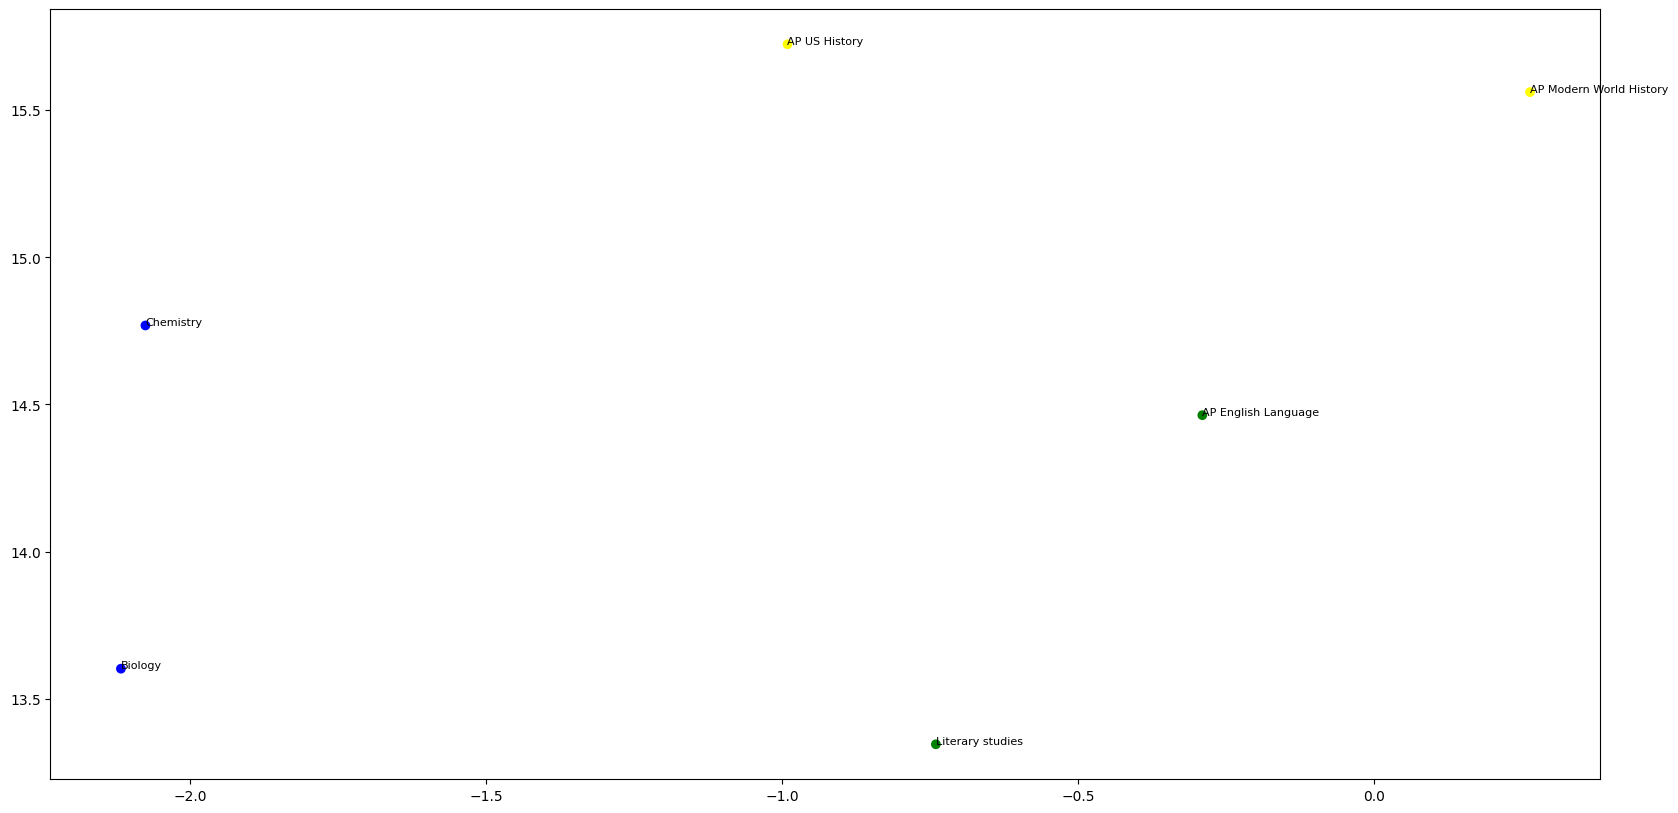

In [2]:
from openai import OpenAI
import numpy as np
import os
from dotenv import load_dotenv
from umap import UMAP
import matplotlib.pyplot as plt

# Load the API key from the .env file
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)  # Initialize the OpenAI client


def get_embeddings_batch(inputs):
    # Call the OpenAI API to get the embeddings for a batch of inputs
    response = client.embeddings.create(
        input=inputs,
        model="text-embedding-3-large"
    )

    # Extract the embeddings
    embeddings = np.array([item.embedding for item in response.data])
    return embeddings


example_data =class_units_data = {
    "Biology": [
        {"name": "Cell Biology", "description": "Study of cells and their structure."},
        {"name": "Genetics", "description": "Examination of genes and heredity."},
        {"name": "Ecology", "description": "Analysis of the relationships between organisms and their environment."},
    ],
    "Chemistry": [
        {"name": "Inorganic Chemistry", "description": "Focus on inorganic compounds."},
        {"name": "Organic Chemistry", "description": "Study of organic compounds and carbon-based molecules."},
        {"name": "Physical Chemistry", "description": "Combination of physics and chemistry principles."},
    ],
    "AP English Language": [
        {"name": "Rhetoric", "description": "Art of persuasive speaking and writing."},
        {"name": "Argumentation", "description": "Development of logical arguments."},
        {"name": "Literary Analysis", "description": "Critical examination of literary works."},
    ],
    "Literary studies": [
        {"name": "American Literature", "description": "Study of literature in the American context."},
        {"name": "British Literature", "description": "Exploration of literature from the British Isles."},
        {"name": "World Literature", "description": "Examination of literature from around the world."},
    ],
    "AP US History": [
        {"name": "Colonial Period", "description": "Historical era of European colonization in the Americas."},
        {"name": "Civil War", "description": "Conflict between Northern and Southern states."},
        {"name": "Roaring Twenties", "description": "Cultural and social changes in the 1920s."},
    ],
    "AP Modern World History": [
        {"name": "World War I", "description": "Global conflict from 1914 to 1918."},
        {"name": "Cold War", "description": "Geopolitical tension between the USA and the USSR."},
        {"name": "Globalization", "description": "Interconnectedness of economies and cultures on a global scale."},
    ]
}
labels = ["Biology", "Chemistry", "AP English Language", "Literary studies", "AP US History", "AP Modern World History"]  # Replace with your actual labels

embeddings = get_embeddings_batch(example_data)

# set hyperparameters for umap. try playing around with them
n_neighbors = 4
min_dist = 0.5
n_components = 2
metric = 'cosine'

# Initialize the UMAP model
umap_model = UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric
)

# Fit the UMAP model to the embeddings
reduced_embeddings = umap_model.fit_transform(embeddings)

# Create a dictionary to map categories to colors
category_color_mapping = {
    "Biology": "blue",
    "Chemistry": "blue",
    "AP English Language": "green",
    "Literary studies": "green",
    "AP US History": "yellow",
    "AP Modern World History": "yellow",
    # Add more classes and colors as needed
}

# Assign colors to data points based on categories
colors = [category_color_mapping[label] for label in labels]

# Plot the reduced embeddings with color coding
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors)
for i, text in enumerate(example_data):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], text, fontsize=8)

plt.gcf().set_size_inches(20, 10)

plt.show()

    